In [18]:
import os
from pathlib import Path
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [19]:
os.chdir(Path.home() / 'code/python/islp')

In [20]:
df = pd.read_csv('data/Auto.csv')
df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
387,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
388,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
389,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
390,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


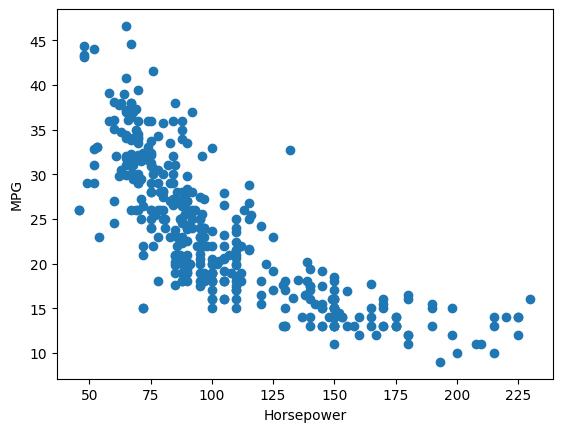

In [21]:
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.scatter(df['horsepower'], df['mpg'])
plt.show()

In [22]:
model = smf.ols('mpg ~ horsepower', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           7.03e-81
Time:                        00:35:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
predictions = model.get_prediction(pd.DataFrame({'horsepower': [98]}))
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


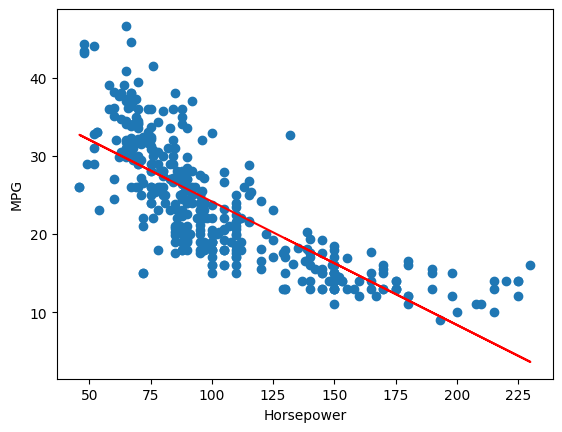

In [24]:
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.scatter(df['horsepower'], df['mpg'])
plt.plot(df['horsepower'].astype('float'), model.fittedvalues, color='red')
plt.show()

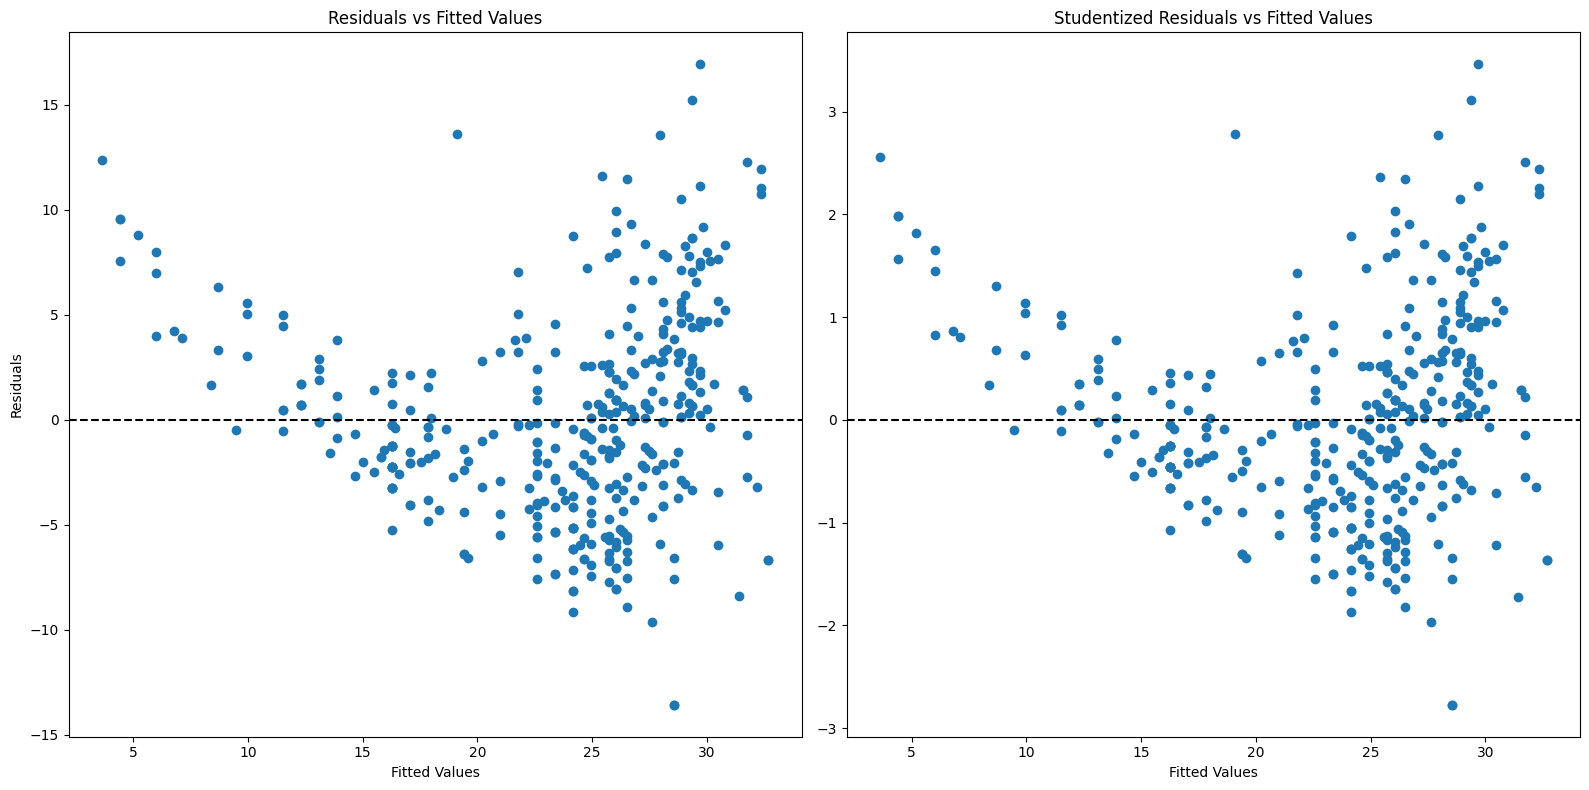

In [25]:
infl = model.get_influence()

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].scatter(model.fittedvalues, model.resid)
axes[0].axhline(0, color='k', linestyle='--')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Fitted Values')

axes[1].scatter(model.fittedvalues, infl.resid_studentized)
axes[1].axhline(0, color='k', linestyle='--')
axes[1].set_xlabel('Fitted Values')
axes[1].set_title('Studentized Residuals vs Fitted Values')

plt.tight_layout()
plt.show()

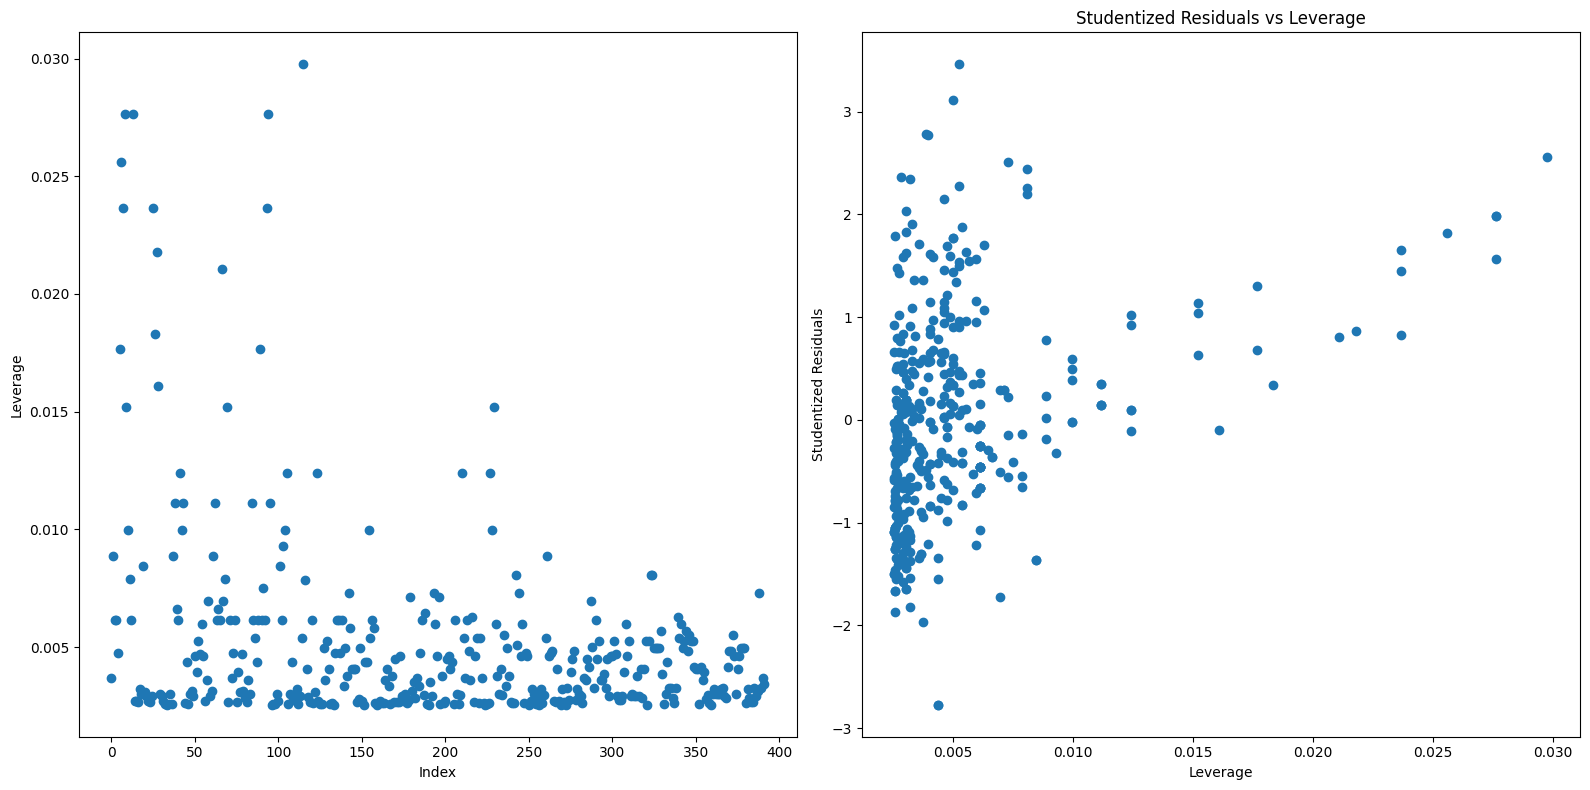

In [26]:
infl = model.get_influence()

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(np.arange(df.shape[0]), infl.hat_matrix_diag)
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

axes[1].scatter(infl.hat_matrix_diag, infl.resid_studentized)
axes[1].set_xlabel('Leverage')
axes[1].set_ylabel('Studentized Residuals')
axes[1].set_title('Studentized Residuals vs Leverage')

plt.tight_layout()
plt.show()

In [27]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


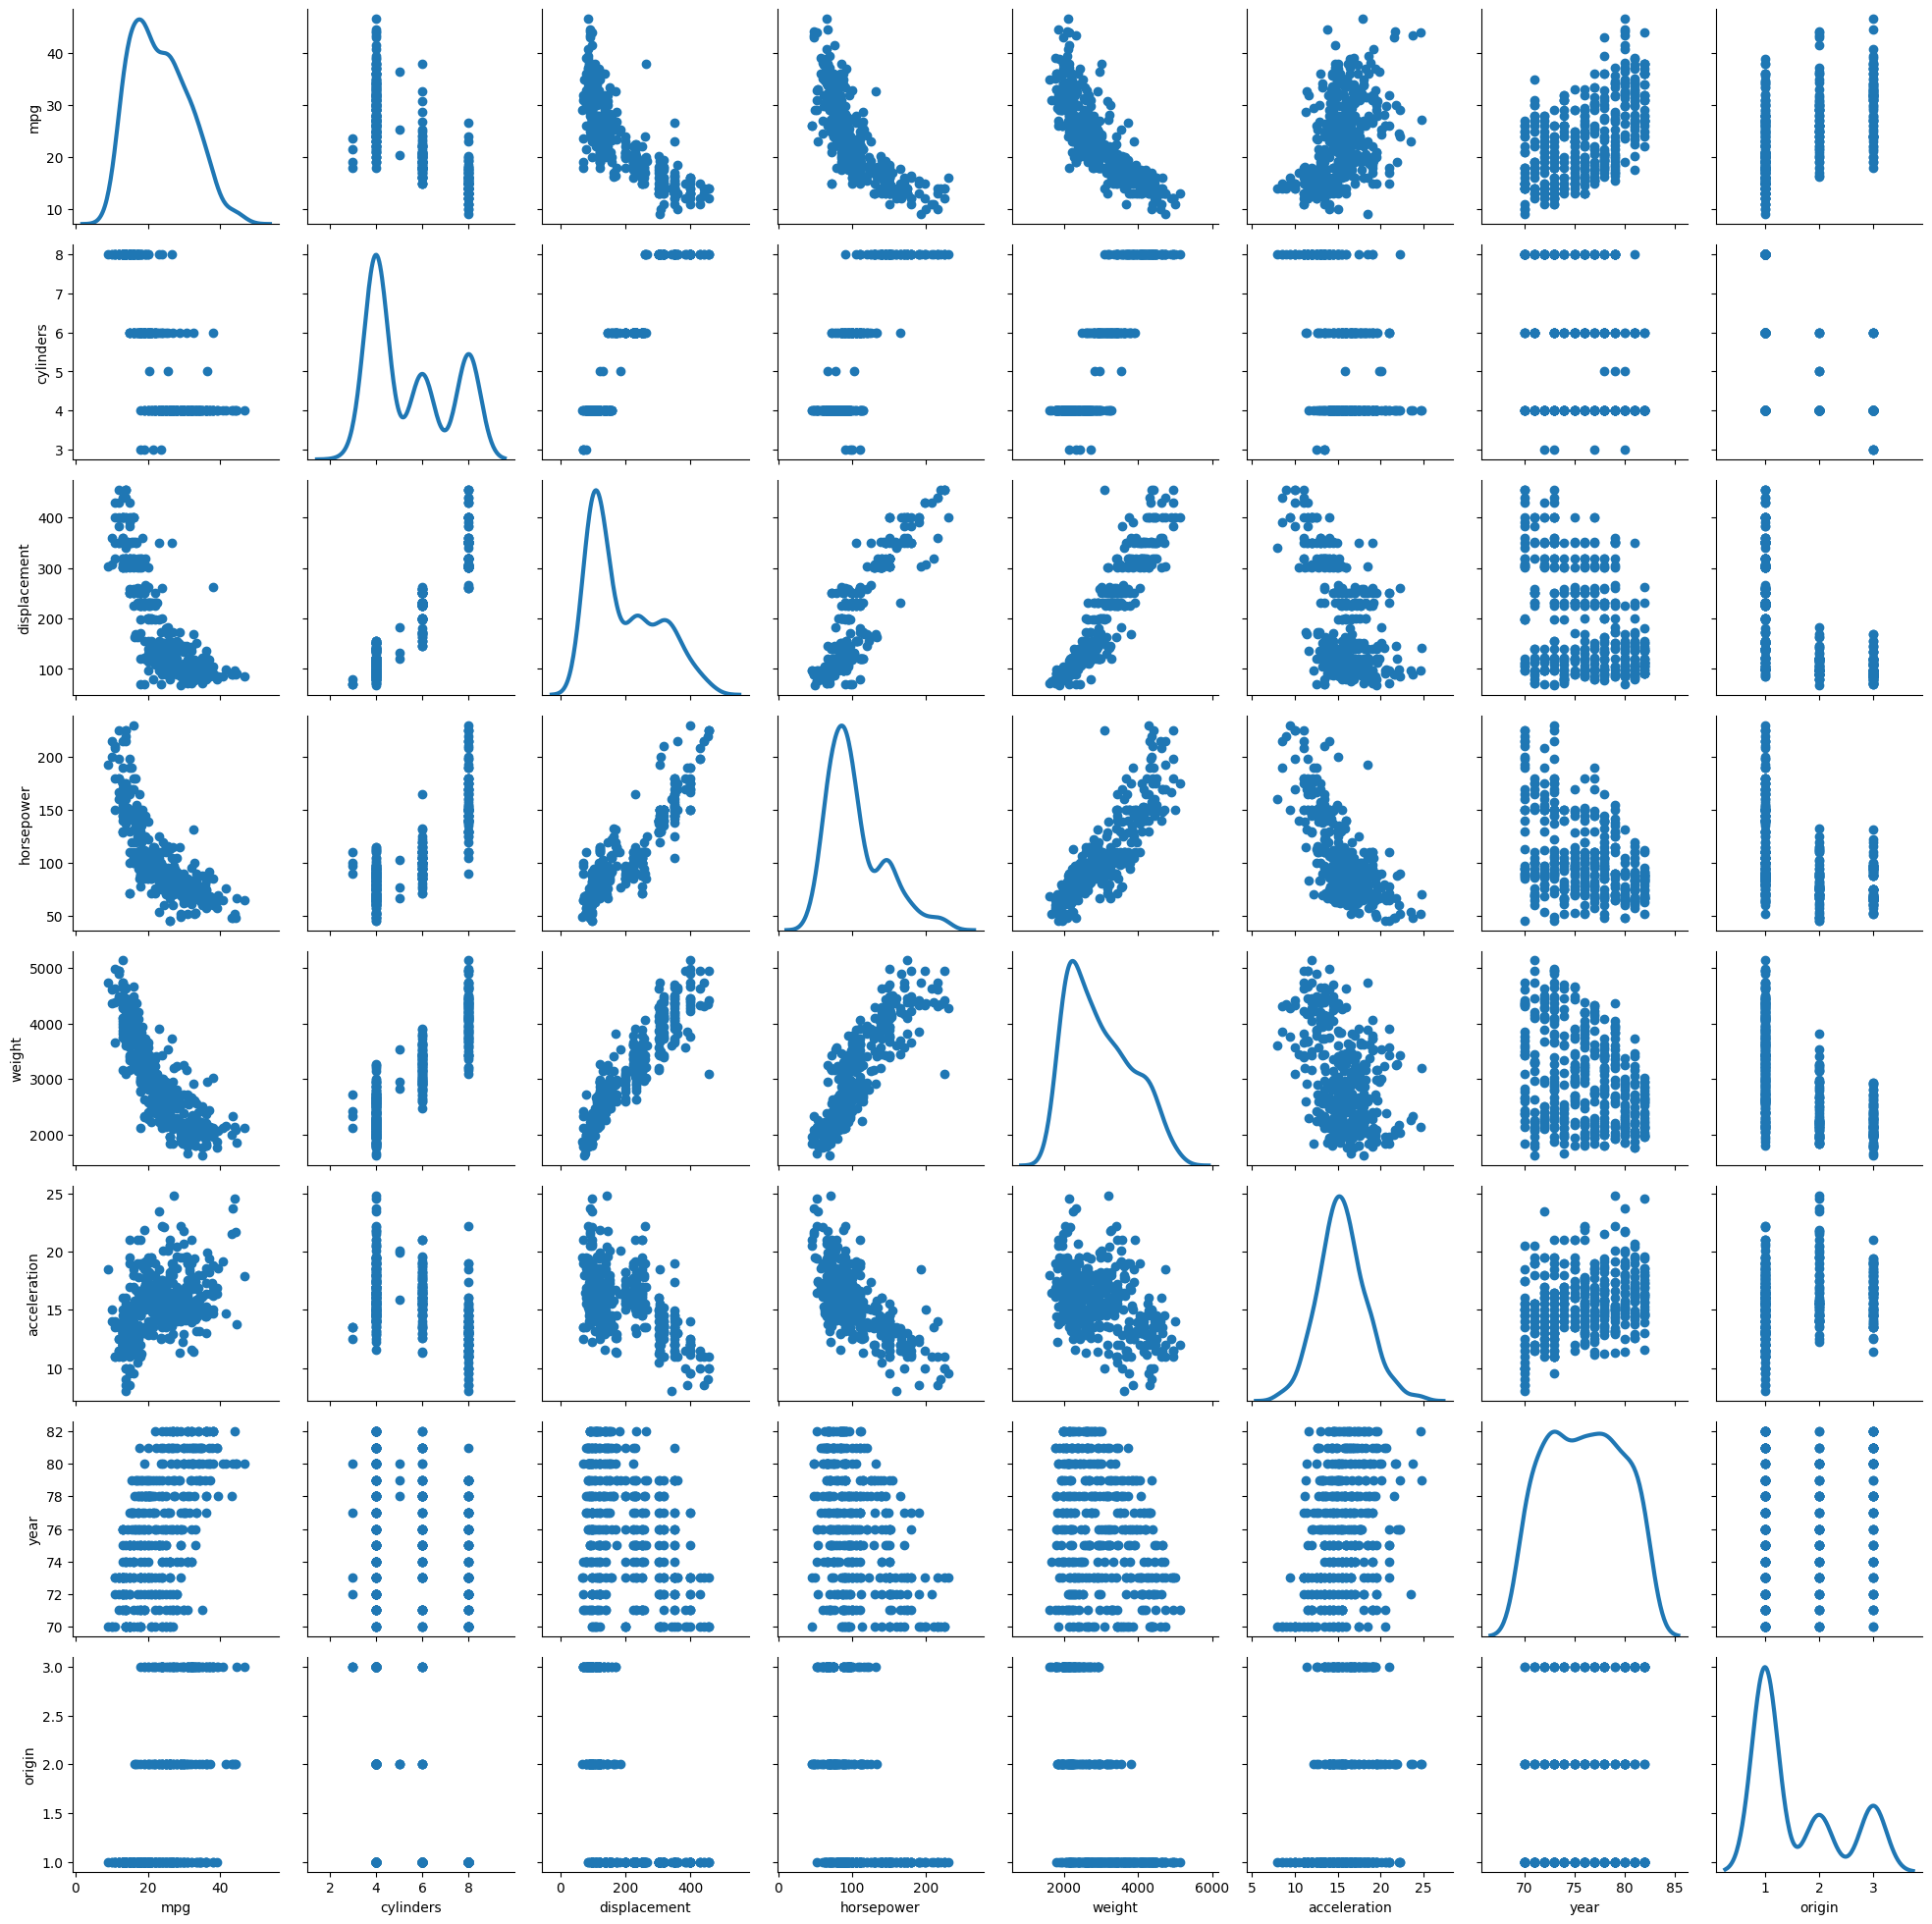

In [28]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_offdiag(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False);

In [29]:
df.set_index('name', drop=True, inplace=True)

In [30]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


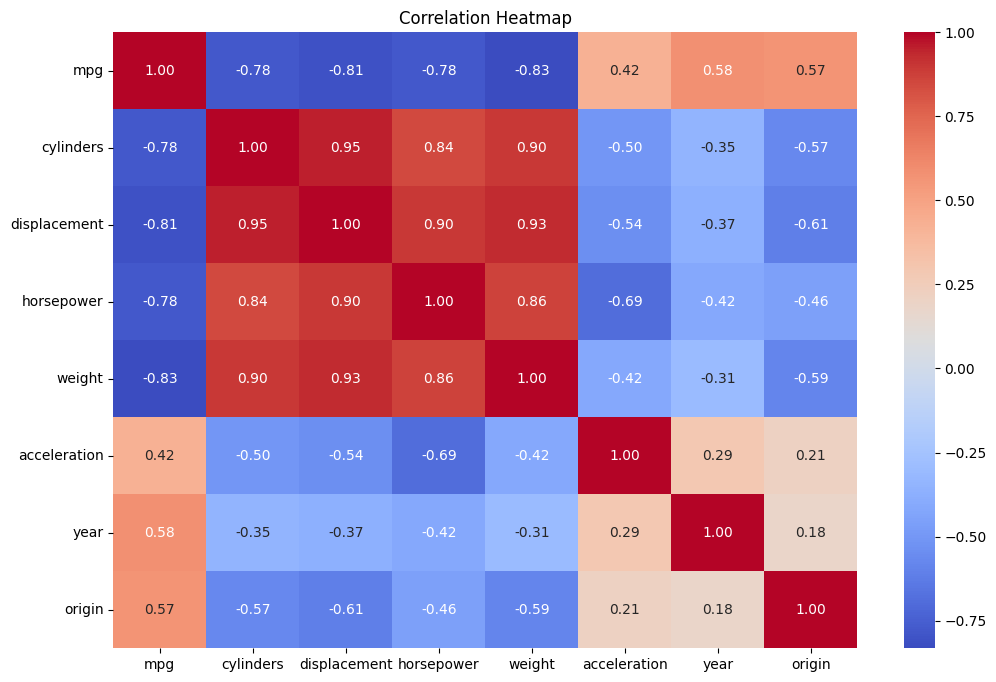

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [32]:
model = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          2.04e-139
Time:                        00:35:34   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""